In [1]:
import pandas as pd
import numpy as np

# ***Reading the data files***

In [2]:
delhi_aqi_file = pd.read_csv("Updated_Dataset_with_AQI (1).csv", index_col=0)
delhi_aqi_file.describe()


,pm25,pm10,o3,no2,so2,co,year,month,PM2.5_AQI,PM10_AQI,NO2_AQI,CO_AQI,O3_AQI,AQI
count,2512.000000,2491.000000,2486.000000,2479.000000,2443.000000,2480.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000
mean,187.619427,186.114412,16.835076,19.020976,5.916496,12.784677,2021.049980,6.493900,225.783548,245.606730,69.932188,18.097000,69.057139,292.879196
std,85.558149,121.448428,14.118048,12.561405,4.768729,7.823667,2.023158,3.476533,134.429674,111.932029,21.696898,11.814251,17.530591,102.082280
min,26.000000,15.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.000000,102.000000,6.000000,10.000000,2.000000,8.000000,2019.000000,3.000000,187.870390,189.000000,62.679245,10.979592,60.444444,223.661749
50%,164.000000,146.000000,13.000000,16.000000,5.000000,11.000000,2021.000000,7.000000,237.346681,234.000000,67.886792,13.000000,66.796296,271.762763
75%,223.000000,231.000000,24.000000,24.000000,9.000000,16.000000,2023.000000,10.000000,304.282282,307.000000,74.830189,28.344828,76.777778,359.181818
max,828.000000,979.000000,108.000000,98.000000,40.000000,75.000000,2025.000000,12.000000,499.399399,606.594203,348.739130,49.865772,211.030303,606.594203


# ***Data cleaning and Data processing***

In [3]:
delhi_aqi_data = pd.DataFrame()
delhi_aqi_data[['date','pm25','pm10','o3','no2','so2','co','AQI']] = delhi_aqi_file[['date','pm25','pm10','o3','no2','so2','co','AQI']]

**Viewing the first five rows**

In [4]:
delhi_aqi_data.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
0,2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0,256.753754
1,2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0,274.264264
2,2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0,369.321321
3,2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0,240.504742
4,2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0,227.000000


**Viewing the last five rows**

In [5]:
delhi_aqi_data.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
2536,2024-09-20,NaN,183.0,27.0,45.0,2.0,22.0,283.0
2537,2020-09-01,NaN,59.0,6.0,16.0,12.0,10.0,159.0
2538,2020-09-06,NaN,91.0,7.0,22.0,10.0,NaN,191.0
2539,2019-09-15,NaN,158.0,13.0,25.0,4.0,10.0,258.0
2540,2019-09-21,NaN,122.0,14.0,17.0,6.0,7.0,222.0


**calculating the size of the dataframe**

In [6]:
delhi_aqi_data.shape

(2541, 8)

**Viewing the columns**

In [7]:
delhi_aqi_data.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI'], dtype='object')

Getting the information about the dataset

In [8]:
delhi_aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 0 to 2540
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2541 non-null   object 
 1   pm25    2512 non-null   float64
 2   pm10    2491 non-null   float64
 3   o3      2486 non-null   float64
 4   no2     2479 non-null   float64
 5   so2     2443 non-null   float64
 6   co      2480 non-null   float64
 7   AQI     2541 non-null   float64
dtypes: float64(7), object(1)
memory usage: 178.7+ KB


Checking the missing values in the dataframe.

In [9]:
delhi_aqi_data.isnull().sum()

date     0
pm25    29
pm10    50
o3      55
no2     62
so2     98
co      61
AQI      0
dtype: int64

There are some missing values in our dataframe which are represented as empty space/" ". We will find the count of these such values.

In [10]:
delhi_aqi_data.isin([" "]).sum(axis=0)

date    0
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
AQI     0
dtype: int64

**Handling the missing values**

Covert all empty spaces with NaN

and then insert the mean of that particular column to thos NaN values

In [11]:
delhi_aqi_data = delhi_aqi_data.replace(to_replace = " ",value = np.nan)

In [12]:
delhi_aqi_data.isnull().sum()

date     0
pm25    29
pm10    50
o3      55
no2     62
so2     98
co      61
AQI      0
dtype: int64

This shows the actual number of missing values as python only understand NaN values as missing values.

In [13]:
delhi_aqi_data.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
2536,2024-09-20,NaN,183.0,27.0,45.0,2.0,22.0,283.0
2537,2020-09-01,NaN,59.0,6.0,16.0,12.0,10.0,159.0
2538,2020-09-06,NaN,91.0,7.0,22.0,10.0,NaN,191.0
2539,2019-09-15,NaN,158.0,13.0,25.0,4.0,10.0,258.0
2540,2019-09-21,NaN,122.0,14.0,17.0,6.0,7.0,222.0


From above we can see that every empty space value has been replaced by the NaN values. Now we will remove the mean

In [14]:
delhi_aqi_data.iloc[:,1:] = delhi_aqi_data.iloc[:,1:].apply(pd.to_numeric)
delhi_aqi_data.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
0,2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0,256.753754
1,2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0,274.264264
2,2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0,369.321321
3,2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0,240.504742
4,2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0,227.000000


In [15]:
delhi_aqi_data.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
2536,2024-09-20,NaN,183.0,27.0,45.0,2.0,22.0,283.0
2537,2020-09-01,NaN,59.0,6.0,16.0,12.0,10.0,159.0
2538,2020-09-06,NaN,91.0,7.0,22.0,10.0,NaN,191.0
2539,2019-09-15,NaN,158.0,13.0,25.0,4.0,10.0,258.0
2540,2019-09-21,NaN,122.0,14.0,17.0,6.0,7.0,222.0


Calculating the mean of the dataframe and escaping the first column of the dataset as it is not an Integer value rather it is an string value.

In [16]:
delhi_aqi_data.iloc[:,1:].mean()

pm25    187.619427
pm10    186.114412
o3       16.835076
no2      19.020976
so2       5.916496
co       12.784677
AQI     292.879196
dtype: float64

Replacing the missing values with mean values

In [17]:
delhi_aqi_data = delhi_aqi_data.fillna(delhi_aqi_data.iloc[:,1:].mean())

In [18]:
delhi_aqi_data.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
2536,2024-09-20,187.619427,183.0,27.0,45.0,2.0,22.000000,283.0
2537,2020-09-01,187.619427,59.0,6.0,16.0,12.0,10.000000,159.0
2538,2020-09-06,187.619427,91.0,7.0,22.0,10.0,12.784677,191.0
2539,2019-09-15,187.619427,158.0,13.0,25.0,4.0,10.000000,258.0
2540,2019-09-21,187.619427,122.0,14.0,17.0,6.0,7.000000,222.0


In [19]:
delhi_aqi_data.isnull().sum()

date    0
pm25    0
pm10    0
o3      0
no2     0
so2     0
co      0
AQI     0
dtype: int64

In [20]:
#delhi_aqi_file = pd.concat([delhi_aqi_file.iloc[[-1]],delhi_aqi_file.iloc[:-1]]).reset_index(drop=True)

In [21]:
delhi_aqi_data.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
0,2024-10-01,153.0,151.0,30.0,22.0,1.0,14.0,256.753754
1,2024-10-02,160.0,161.0,35.0,22.0,3.0,13.0,274.264264
2,2024-10-03,198.0,158.0,31.0,20.0,3.0,13.0,369.321321
3,2024-10-04,141.0,129.0,32.0,17.0,2.0,11.0,240.504742
4,2024-10-05,112.0,127.0,28.0,14.0,3.0,8.0,227.000000


In [22]:
delhi_aqi_data.tail()

,date,pm25,pm10,o3,no2,so2,co,AQI
Unnamed: 0,,,,,,,,
2536,2024-09-20,187.619427,183.0,27.0,45.0,2.0,22.000000,283.0
2537,2020-09-01,187.619427,59.0,6.0,16.0,12.0,10.000000,159.0
2538,2020-09-06,187.619427,91.0,7.0,22.0,10.0,12.784677,191.0
2539,2019-09-15,187.619427,158.0,13.0,25.0,4.0,10.000000,258.0
2540,2019-09-21,187.619427,122.0,14.0,17.0,6.0,7.000000,222.0


# ***Define Features and Target***

In [ ]:
# Extract month from date column
delhi_aqi_data['date'] = pd.to_datetime(delhi_aqi_data['date'])
delhi_aqi_data['month'] = delhi_aqi_data['date'].dt.month


In [23]:
features = ['o3','pm25','pm10','no2','so2','co']
Y = delhi_aqi_data.AQI

In [24]:
X = delhi_aqi_data[features]

In [25]:
X.head()

,o3,pm25,pm10,no2,so2,co
Unnamed: 0,,,,,,
0,30.0,153.0,151.0,22.0,1.0,14.0
1,35.0,160.0,161.0,22.0,3.0,13.0
2,31.0,198.0,158.0,20.0,3.0,13.0
3,32.0,141.0,129.0,17.0,2.0,11.0
4,28.0,112.0,127.0,14.0,3.0,8.0


Splitting the data into training and valuation data kudos

In [ ]:
from sklearn.model_selection import train_test_split

In [27]:
train_X, val_X, train_Y, val_Y = train_test_split(X,Y,test_size=0.2, random_state=42)

# Training the model

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(train_X,train_Y)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = forest_model.predict(val_X)

# Evaluating the model performance

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
# mae = mean_absolute_error(val_Y,y_pred)
# print(mae)

In [33]:
mse = mean_squared_error(val_Y,y_pred)
r2 = r2_score(val_Y,y_pred)

In [34]:
print("\nInitial Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Initial Model Performance:
Mean Squared Error: 100.06
R² Score: 0.99


# Grid

In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid_search = GridSearchCV(estimator=forest_model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')

In [38]:
grid_search.fit(train_X, train_Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [39]:
print("\nBest Hyperparameters Found:")
print(grid_search.best_params_)


Best Hyperparameters Found:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [40]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(val_X)
mse_best = mean_squared_error(val_Y, y_pred_best)
r2_best = r2_score(val_Y, y_pred_best)

In [41]:
print("\nTuned Model Performance:")
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R² Score: {r2_best:.2f}")


Tuned Model Performance:
Mean Squared Error: 94.18
R² Score: 0.99


Visualizing the results i.e. actual v/s predicted

In [42]:
import matplotlib.pyplot as plt

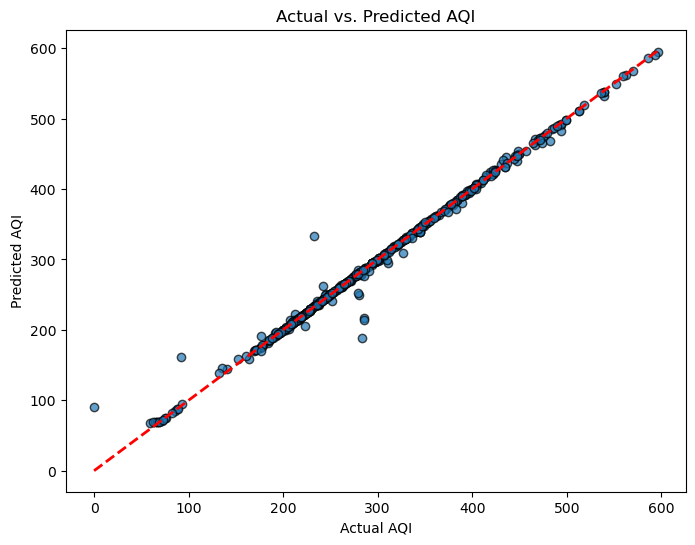

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(val_Y, y_pred_best, alpha=0.7, edgecolors='k')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs. Predicted AQI")
# Plot a reference line where predicted equals actual
plt.plot([val_Y.min(), val_Y.max()], [val_Y.min(), val_Y.max()], 'r--', lw=2)
plt.show()

In [44]:
import pickle

# Save the trained model using the correct variable name
with open("rf_model.pkl", "wb") as f:
    pickle.dump(forest_model, f)
